# Busqueda por Profundidad

Este metodo de busqueda por profundidad recorre un grafo(arbol) desde la raíz por la izquierda hata la profundidad maxima (nivel más alto), retorna nodos y continúa con la derecha. Para este proceso se utiliza una pila LIFO(Last In First Out). Por lo que esta pila tiene 2 operaciones: introducir y extraer un dato de la pila (Siendo el ultimo dato el que se extrae de esta).
<br><br>
Nos muestran el siguiente ejemplo:



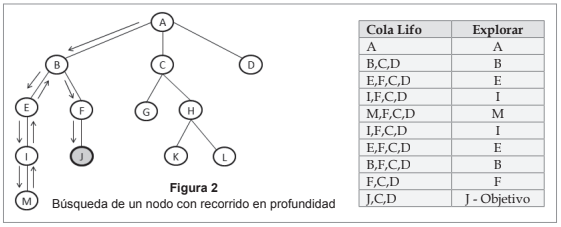

Teniendo como nodo raís el nodo <b>A</b> u teniendo como objetivo el nodo <b>J</b>, como se puede apreciar inicia en el nodo <b>A</b>, baja por la izquierda y cuando llega al punto más bajo de sus nodos de la izquierda osea el nodo <b>M</b> regresa recursivamente hasta el siguiente nodo por el que pueda bajar siendo este el nodo <b>B</b>, para posteriormente volver a bajar y econtrarse con el objetivo <b>J</b>.
<br><br>
La ruta completa sería: <b>A -> B -> E -> I -> M -> I -> E -> B -> F -> J</b> 

### Veamos como sería esto en codgio (DFS)

In [4]:
#Primero Creamos la clase Nodos en la que declararemos, las caracteristicas
# basicas de cada nodo que entrará dentro del grafo/arbol.
# una parte importante para este algoritmo es reconocer o detectar cuando un Nodo
# ya a sido visitado con anterioridad.
# Otra parte importante es el padre, siendo este realmente el nodo del que proviene otro nodo.
 

class Nodo:
    def __init__(self,id):
        self.id=id
        self.visitado=False
        self.padre = None
        self.neighbor=[]
    
    def addNeighbor(self,n):
        if not n in self.neighbor:
            self.neighbor.append(n)
    
    def __str__(self):
        return str(self.id)

class Grafo:
    def __init__(self):
        self.nodos = {}
        self.reco = ''
        self.vali=False
    
    def addNodo(self,n):
        if n not in self.nodos:
            self.nodos[n] = Nodo(n)

    def addArista(self, n1, n2):
        if n1 in self.nodos and n2 in self.nodos:
            self.nodos[n1].addNeighbor(n2)
            self.nodos[n2].addNeighbor(n1)

    def dfs(self,r,d,v):
        if r in self.nodos:
            #print('r: '+r)
            self.nodos[r].visitado = True
            #print('nodo en r: '+str(self.nodos[r]))
            for n in self.nodos[r].neighbor:
                #print('n: '+n)
                if self.nodos[n].visitado == False:
                    #print('nodo en n: '+str(self.nodos[n]))
                    self.nodos[n].padre = r
                    self.reco+=' -> '+n
                    #print('('+str(r)+', '+str(n)+')')
                    if n == d:
                        print('\nDestino Encontrado')
                        print('Recorrido: '+v+ self.reco)
                        self.vali = True
                        return
                    #input()
                    #print('----------------------------')    
                    self.dfs(n,d,v)
                    if self.vali:
                        return 
                    self.reco+=' -> '+r
            if self.vali:
                return 

def main():
    g = Grafo()
    
    for x in 'ABCDEFGHIJKLM':
        g.addNodo(x)

    l = ['A','B','A','C','A','D','B','E','B','F','E','I','I','M','F','J','C','G','C','H','H','K','H','L']
    for x in range(0,len(l)-1,2):
        g.addArista(l[x],l[x+1])

    g.dfs('A','J','A')

main()


Destino Encontrado
Recorrido: A -> B -> E -> I -> M -> I -> E -> B -> F -> J


Esta busqueda recorre un árbol/grafo por niveles, partiendo del nodo raíz.

<ol type="a" >
    <li>Inicia la visita del grafo por el nodo raíz</li>
    <li>Visita todos los nodos adyacentes provemientes de la raíz</li>
    <li>Por cada nodo visitado se visitan todos los nodos hijos</li>
    <li>Se sigue el proceso hasta que el el objetivo se encuentra</li>
</ol>
<br>
Este tipo de recorrido se implementa usando una cola FIFO (First In First Out) para almacenar los nodos. Para avanzar con la explicación usaremos de ejemplo la siguiente imagen:

# Busqueda por Amplitud

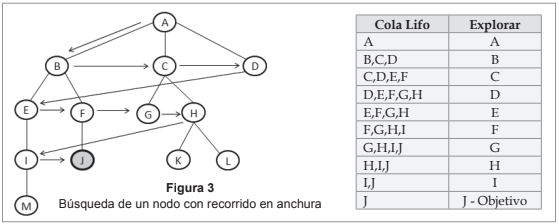

Como pueden ver este algoritmo recorre el mismo árbol, pero utilizando una busqueda que viaja por los niveles de dicho árbol. Y algo interesante siempre viaja de izquierda a derecha, sin embargo este tipo de algoritmos no es optimo para nadie, pues la forma en la que recorre un arbol es muy impresisa, y en lo personal creo que es muy situacional, pues si es un arbol en donde se quiere encontrar datos que estén en un nivel de entre 0 a 2, podría ser beneficioso, pero si por el contrario el nodo que se quiere encontrar está en los ultimos niveles, es un coste de busquedas muy amplio
<br>
<br>
Veamos el recorrido: A -> B -> C -> D -> E -> F -> G -> H -> I -> J 

### Veamos un caso practico (BFS)

In [5]:
# Utilizaremos la misma estructura que el problema anterior, pero cambiando

class Nodo:
    def __init__(self,id):
        self.id=id
        self.visitado=False
        self.nivel=-1
        self.neighbor=[]
    
    def addNeighbor(self,n):
        if not n in self.neighbor:
            self.neighbor.append(n)
    
    def __str__(self):
        return str(self.id)

class Grafo:
    def __init__(self):
        self.nodos = {}
        self.reco = ''
    
    def addNodo(self,n):
        if n not in self.nodos:
            self.nodos[n] = Nodo(n)

    def addArista(self, n1, n2):
        if n1 in self.nodos and n2 in self.nodos:
            self.nodos[n1].addNeighbor(n2)
            self.nodos[n2].addNeighbor(n1)
    
    def bfs(self,r,d):
        if r in self.nodos:
            cola = [r]
            self.nodos[r].visitado = True
            self.nodos[r].nivel = 0
            
            #print('('+str(r)+', '+str(self.nodos[r].nivel)+')')
            self.reco = r
            while(len(cola)>0):
                act = cola[0]
                cola = cola[1:]

                for n in self.nodos[act].neighbor:
                    if self.nodos[n].visitado == False:
                        cola.append(n)
                        self.nodos[n].visitado = True
                        self.nodos[n].nivel = self.nodos[act].nivel+1
                        self.reco += ' -> '+n
                        if(n == d):
                            print('Destino encontrado')
                            print('Recorrido: '+self.reco)
                            print('nivel: ',self.nodos[n].nivel)
                        #print('('+str(n)+', '+str(self.nodos[n].nivel)+')')

def main():
    g = Grafo()
    
    for x in 'ABCDEFGHIJKLM':
        g.addNodo(x)

    l = ['A','B','A','C','A','D','B','E','B','F','E','I','I','M','F','J','C','G','C','H','H','K','H','L']
    for x in range(0,len(l)-1,2):
        g.addArista(l[x],l[x+1])

    g.bfs('A','J')

main()

Destino encontrado
Recorrido: A -> B -> C -> D -> E -> F -> G -> H -> I -> J
nivel:  3
